# Twitter Sentiment Analysis
Author: Brenda De Leon

## Exploratory Data Analysis
We will perform initial investigations on the data and look for patterns. Sorted text statistics and graphical representations will help us to test hypothesis and to check assumptions.

#### Libraries

In [418]:
# importing relevant libraries
# !pip install wordcloud
# !pip install nltk
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random 
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.util import ngrams

import re
import string
from PIL import Image # for opening, manipulating image files
from textwrap import wrap
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_validate
from matplotlib import cm
from nltk import FreqDist, pos_tag 
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Data

In [419]:
# importing updated dataset as df
df = pd.read_csv('data/clean_df.csv')
# previewing data
df.head()

level_0  index                                              Tweet  \
0        0      0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1        1      1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2        2      2  @swonderlin Can not wait for #iPad 2 also. The...   
3        3      3  @sxsw I hope this year's festival isn't as cra...   
4        4      4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

     Brand_or_Product         Sentiment    target  \
0              iPhone  Negative emotion  Negative   
1  iPad or iPhone App  Positive emotion  Positive   
2                iPad  Positive emotion  Positive   
3  iPad or iPhone App  Negative emotion  Negative   
4              Google  Positive emotion  Positive   

                                        clean_tweets  \
0  i have a 3g iphone after 3 hrs tweeting at it ...   
1  know about awesome ipad iphone app that you'll...   
2  can not wait for 2 also they should sale them ...   
3  i hope this year's festival isn't as crashy as...   
4  great stuff on fri marissa mayer google tim o'...   

                                 preprocessed_tweets   brand brand_sorted  \
0  wesley g iphone hr tweet rise austin dead need...   Apple        Apple   
1  jessedee know fludapp awesome ipad iphone app ...   Apple        Apple   
2                swonderlin wait ipad also sale sxsw   Apple        Apple   
3  sxsw hope year festival crashy year iphone app...   Apple        Apple   
4  sxtxstate great stuff fri sxsw marissa mayer g...  Google       Google   

   ... capital_char_count  capital_word_count  \
0  ...                 15                   4   
1  ...                 10                   1   
2  ...                  7                   1   
3  ...                  2                   1   
4  ...                 14                   1   

                                         punct_count  sent_count  \
0  {'! count': 1, '" count': 0, '# count': 2, '$ ...           5   
1  {'! count': 0, '" count': 0, '# count': 1, '$ ...           3   
2  {'! count': 0, '" count': 0, '# count': 2, '$ ...           2   
3  {'! count': 0, '" count': 0, '# count': 1, '$ ...           2   
4  {'! count': 0, '" count': 0, '# count': 1, '$ ...           1   

   unique_word_count  stopword_count  avg_wordlength  avg_sentlength  \
0                 21               7        5.521739        4.600000   
1                 22               7        6.318182        7.333333   
2                 15               6        5.266667        7.500000   
3                 12               5        5.466667        7.500000   
4                 17               1        7.705882       17.000000   

  unique_vs_words  stopwords_vs_words  
0        0.913043            0.304348  
1        1.000000            0.318182  
2        1.000000            0.400000  
3        0.800000            0.333333  
4        1.000000            0.058824  

[5 rows x 26 columns]

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7931 entries, 0 to 7930
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              7931 non-null   int64  
 1   index                7931 non-null   int64  
 2   Tweet                7931 non-null   object 
 3   Brand_or_Product     7931 non-null   object 
 4   Sentiment            7931 non-null   object 
 5   target               7931 non-null   object 
 6   clean_tweets         7930 non-null   object 
 7   preprocessed_tweets  7931 non-null   object 
 8   brand                7931 non-null   object 
 9   brand_sorted         7931 non-null   object 
 10  hashtags             7926 non-null   object 
 11  htag_count           7931 non-null   int64  
 12  mentions             4270 non-null   object 
 13  mention_count        7931 non-null   int64  
 14  char_count           7931 non-null   int64  
 15  word_count           7931 non-null   i

### Stop Words
After reviewing the cleaned tweets, we are adding additional stopwords to nltk's built in english stop word list

In [421]:
# import english stop word list and add additional strings to list
sw_list = stopwords.words(['english'])
sw_list += list(string.punctuation)
sw_list += ["''", '""', "...", 'e``', '"', '"', '#sxsw', '@sxsw', 'sxsw', 'says', '-', 'com', '@mention', 'mention', 'rt', '{link}', 'link', 'i', 'w/', '&amp;', '&amp','amp;', 'amp', "'ll", "'s", "n't", 'get', "'re", 'sxsw.', 'sxswi', 'quot', 'http', '//bit.ly/ieavob', '//j.mp/grn7pk', 'also', '//bit.ly/', "'m", 'via', "'ve", '//t.co/', 'v', '//bit.ly', '���', 'go', 'one', 'got', 'get', 'doe', 'ha', 'wa']
# adding additional words to stopwords_list
# sw_list += [ 'ipad', 'apple', 'google', 'store', 'iphone']

### Helper Functions
In order to view the most common and significant bigrams and trigrams we are creating functions that utilize the "AssocMeasures" modules. These modules can be used to determine the significance of an n-gram in a given text. [(Documentation - Sample usage for collocations)](https://www.nltk.org/howto/collocations.html)

In [422]:
# bigram function
def bigram(tokens, pmi=False, apply_filter=5):
    # bigram measures
    bigram_measures = nltk.collocations.BigramAssocMeasures
    
    if pmi:
        # using mutual information score (pmi) to find top bigrams
        pmi_finder = BigramCollocationFinder.from_words(tokens)
        # ignoring all bigrams which occur less than five times in the corpus
        pmi_finder.apply_freq_filter(apply_filter)
        pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)  
        
        return pmi_scored
    else:
        # creating bigrams
        finder = BigramCollocationFinder.from_words(tokens)
        # requiring a minimum frequency to be considered when measuring for top bigrams
        scored = finder.score_ngrams(bigram_measures.raw_freq)
        
        return scored

In [423]:
# trigram function
def trigram(tokens, pmi=False, apply_filter=5):
    # trigram measures
    trigram_measures = nltk.collocations.TrigramAssocMeasures
    
    if pmi:
        # using mutual information score (pmi) to find top trigrams
        pmi_finder = TrigramCollocationFinder.from_words(tokens)
        # ignoring all trigrams which occur less than five times in the corpus
        pmi_finder.apply_freq_filter(apply_filter)
        pmi_scored = pmi_finder.score_ngrams(trigram_measures.pmi)  
        
        return pmi_scored
    else:
        # creating trigrams
        finder = TrigramCollocationFinder.from_words(tokens)
        # requiring a minimum frequency to be considered when measuring for top trigrams
        scored = finder.score_ngrams(trigram_measures.raw_freq)
        
        return scored

To visually inspect for hashtag patterns we extract the hashtags from the tweets using the regex library in Python and create a new column. These hashtags are later converted and sorted into a list. 

In [424]:
# hashtag extraction and lowercase function
def find_hashtags(tweet):
    #This function extracts hashtags from the tweets.
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
  
df['htags'] = df.Tweet.str.lower().apply(find_hashtags)

### Corpus Statistics

### Most Frequent Words
We will compare the raw word frequency distributions of each category. Since this is clasification we want comparative visuals. 
##### Most Frequent Words by Brand

In [425]:
df['brand_sorted'].value_counts()

Apple     5385
Google    2546
Name: brand_sorted, dtype: int64

In [426]:
# separate data by the two brands 
df_freq_apple = df[df['brand_sorted']=='Apple']
df_freq_google = df[df['brand_sorted']=='Google']

In [427]:
# separate tweets by the two brands
apple_data = df_freq_apple['preprocessed_tweets']
google_data = df_freq_google['preprocessed_tweets']

In [428]:
# make data into list of tweets
data_apple= apple_data.to_list()
data_google = google_data.to_list()

In [429]:
# join list of tweets on ","
data_apple = ",".join(data_apple)
data_google = ",".join(data_google)

In [430]:
# tokenize list of joined apple tweets
apple_tokens = word_tokenize(data_apple)
# lowercase all tokens and only keep tokens not in stopword list
apple_stopped = [token.lower() for token in apple_tokens if token.lower() not in sw_list]

In [431]:
# tokenize list of joined google tweets
google_tokens = word_tokenize(data_google)
# lowercase all tokens and only keep tokens not in stopword list
google_stopped = [token.lower() for token in google_tokens if token.lower() not in sw_list]

In [432]:
# similar step as earlier. making separated brand tweets into a list and splitting tweets into words (sw not removed)
pros_apple = [d.split() for d in apple_data.to_list()]
pros_google = [d.split() for d in google_data.to_list()]

In [433]:
# counting unique apple vocabulary
total_vocab_apple = set()
for tweet in pros_apple:
    total_vocab_apple.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_apple)

5641

In [434]:
# counting unique google vocabulary
total_vocab_google = set()
for tweet in pros_google:
    total_vocab_google.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_google)

3408

In [435]:
# to look at frequency distributions
apple_freq = FreqDist(apple_stopped)
google_freq = FreqDist(google_stopped)

In [436]:
# top 25 apple words
apple_freq.most_common(25)

[('ipad', 2848),
 ('apple', 2187),
 ('iphone', 1497),
 ('store', 1412),
 ('austin', 772),
 ('app', 626),
 ('pop', 551),
 ('new', 510),
 ('open', 468),
 ('line', 419),
 ('win', 262),
 ('temporary', 253),
 ('launch', 246),
 ('free', 242),
 ('come', 222),
 ('downtown', 210),
 ('android', 209),
 ('like', 198),
 ('popup', 196),
 ('design', 193),
 ('day', 186),
 ('time', 182),
 ('see', 179),
 ('use', 177),
 ('need', 167)]

In [437]:
# top 25 google words
google_freq.most_common(25)

[('google', 2379),
 ('circle', 648),
 ('social', 548),
 ('new', 525),
 ('launch', 493),
 ('network', 436),
 ('today', 378),
 ('android', 356),
 ('call', 339),
 ('major', 290),
 ('party', 248),
 ('possibly', 237),
 ('mayer', 191),
 ('map', 189),
 ('mobile', 179),
 ('marissa', 164),
 ('search', 128),
 ('app', 121),
 ('check', 114),
 ('location', 104),
 ('time', 101),
 ('bing', 101),
 ('use', 99),
 ('say', 96),
 ('come', 92)]

##### Normalized Word Frequencies by Brand

In [438]:
apple_total_word_count = sum(apple_freq.values())
apple_top_25 = apple_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in apple_top_25:
    normalized_frequency = word[1]/apple_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.0589
apple 		 0.04523
iphone 		 0.03096
store 		 0.0292
austin 		 0.01596
app 		 0.01295
pop 		 0.01139
new 		 0.01055
open 		 0.009678
line 		 0.008665
win 		 0.005418
temporary 		 0.005232
launch 		 0.005087
free 		 0.005005
come 		 0.004591
downtown 		 0.004343
android 		 0.004322
like 		 0.004095
popup 		 0.004053
design 		 0.003991
day 		 0.003846
time 		 0.003764
see 		 0.003702
use 		 0.00366
need 		 0.003454


In [439]:
# using function for top 25 apple bigrams
bigram(apple_stopped)[:25]

[(('apple', 'store'), 0.012015055008685582),
 (('pop', 'store'), 0.006783025891306146),
 (('apple', 'open'), 0.0063487467946066675),
 (('iphone', 'app'), 0.005997187525849946),
 (('apple', 'pop'), 0.0042393911820663415),
 (('temporary', 'store'), 0.0038464719993382412),
 (('downtown', 'austin'), 0.0037637521713954833),
 (('store', 'austin'), 0.0037017123004384153),
 (('store', 'downtown'), 0.003598312515509968),
 (('ipad', 'launch'), 0.0034121929026387624),
 (('austin', 'ipad'), 0.0031847133757961785),
 (('open', 'temporary'), 0.0030192737199106626),
 (('open', 'pop'), 0.00272975432211101),
 (('new', 'ipad'), 0.002543634709239805),
 (('ipad', 'apple'), 0.0023988750103399784),
 (('ipad', 'app'), 0.002233435354454463),
 (('win', 'ipad'), 0.002026635784597568),
 (('pop', 'apple'), 0.0019439159566548101),
 (('ipad', 'design'), 0.0018611961287120524),
 (('apple', 'set'), 0.0018405161717263629),
 (('app', 'store'), 0.0018198362147406734),
 (('line', 'apple'), 0.0018198362147406734),
 (('appl

In [440]:
# using function for top 25 apple trigrams
trigram(apple_stopped)

[(('apple', 'pop', 'store'), 0.0034949127305815204),
 (('store', 'downtown', 'austin'), 0.0033294730746960045),
 (('apple', 'open', 'temporary'), 0.0028951939779965257),
 (('open', 'temporary', 'store'), 0.002833154107039457),
 (('downtown', 'austin', 'ipad'), 0.0023161551823972205),
 (('apple', 'open', 'pop'), 0.002295475225411531),
 (('austin', 'ipad', 'launch'), 0.002295475225411531),
 (('open', 'pop', 'store'), 0.002067995698568947),
 (('temporary', 'store', 'downtown'), 0.002026635784597568),
 (('pop', 'apple', 'store'), 0.0018818760856977416),
 (('pop', 'store', 'austin'), 0.0018405161717263629),
 (('iphone', 'app', 'store'), 0.0015509967739267103),
 (('rumor', 'apple', 'open'), 0.0014475969889982628),
 (('new', 'ubersocial', 'iphone'), 0.0014062370750268839),
 (('ubersocial', 'iphone', 'app'), 0.0014062370750268839),
 (('app', 'store', 'include'), 0.0013855571180411944),
 (('store', 'include', 'uberguide'), 0.0013855571180411944),
 (('popup', 'apple', 'store'), 0.001158077591198

In [441]:
google_total_word_count = sum(google_freq.values())
google_top_25 = google_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in google_top_25:
    normalized_frequency = word[1]/google_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.09983
circle 		 0.02719
social 		 0.023
new 		 0.02203
launch 		 0.02069
network 		 0.0183
today 		 0.01586
android 		 0.01494
call 		 0.01423
major 		 0.01217
party 		 0.01041
possibly 		 0.009945
mayer 		 0.008015
map 		 0.007931
mobile 		 0.007511
marissa 		 0.006882
search 		 0.005371
app 		 0.005077
check 		 0.004784
location 		 0.004364
time 		 0.004238
bing 		 0.004238
use 		 0.004154
say 		 0.004028
come 		 0.003861


In [442]:
# using function for top 25 google bigrams
bigram(google_stopped)[:25]

[(('social', 'network'), 0.01791783811002476),
 (('new', 'social'), 0.016742897906088707),
 (('google', 'launch'), 0.015022449750325207),
 (('call', 'circle'), 0.013511812345264572),
 (('network', 'call'), 0.013302001594561704),
 (('major', 'new'), 0.012085099240485082),
 (('launch', 'major'), 0.011749402039360497),
 (('possibly', 'today'), 0.009861105283034704),
 (('circle', 'possibly'), 0.009777180982753556),
 (('google', 'circle'), 0.008644202928958079),
 (('marissa', 'mayer'), 0.006378246821367127),
 (('google', 'map'), 0.005706852419117956),
 (('today', 'google'), 0.005706852419117956),
 (('google', 'party'), 0.0036087449120892953),
 (('google', 'bing'), 0.0032310855608241366),
 (('circle', 'google'), 0.0028114640594184047),
 (('mayer', 'google'), 0.0027695019092778316),
 (('launch', 'new'), 0.0025596911585749654),
 (('google', 'marissa'), 0.00222399395745038),
 (('android', 'app'), 0.0019302589064663673),
 (('digital', 'physical'), 0.0017204481557635013),
 (('circle', 'today'), 0

In [443]:
# using function for top 25 google trigrams
trigram(google_stopped)[:25]

[(('new', 'social', 'network'), 0.015735806302714952),
 (('social', 'network', 'call'), 0.013302001594561704),
 (('network', 'call', 'circle'), 0.013218077294280558),
 (('major', 'new', 'social'), 0.012085099240485082),
 (('launch', 'major', 'new'), 0.011749402039360497),
 (('google', 'launch', 'major'), 0.0111199697872519),
 (('circle', 'possibly', 'today'), 0.009777180982753556),
 (('call', 'circle', 'possibly'), 0.009483445931769544),
 (('today', 'google', 'launch'), 0.004280139314338466),
 (('possibly', 'today', 'google'), 0.004238177164197893),
 (('launch', 'new', 'social'), 0.002475766858293819),
 (('marissa', 'mayer', 'google'), 0.00222399395745038),
 (('google', 'marissa', 'mayer'), 0.002140069657169233),
 (('social', 'network', 'circle'), 0.0016365238554823548),
 (('digital', 'physical', 'world'), 0.0015945617053417817),
 (('google', 'launch', 'new'), 0.0015945617053417817),
 (('connect', 'digital', 'physical'), 0.0015525995552012086),
 (('physical', 'world', 'mobile'), 0.0015

##### Most Frequent Words by Sentiment

In [444]:
df['target'].value_counts()

Neutral     4542
Positive    2845
Negative     544
Name: target, dtype: int64

In [445]:
# separate data by the three sentiments/classes
df_freq_positive = df[df['target']=='Positive']
df_freq_negative = df[df['target']=='Negative']
df_freq_neutral = df[df['target']=='Neutral']

In [446]:
# separate tweets by the three sentiments/classes
positive_data = df_freq_positive['preprocessed_tweets']
negative_data = df_freq_negative['preprocessed_tweets']
neutral_data = df_freq_neutral['preprocessed_tweets']

In [447]:
# make data into list of tweets
data_positive = positive_data.to_list()
data_negative = negative_data.to_list()
data_neutral = neutral_data.to_list()

In [448]:
# join list of tweets on ","
data_positive = ",".join(data_positive)
data_negative = ",".join(data_negative)
data_neutral = ",".join(data_neutral)

In [449]:
# tokenize list of joined positive tweets
positive_tokens = word_tokenize(data_positive)
# lowercase all tokens and only keep tokens not in stopword list
pos_stopped = [token.lower() for token in positive_tokens if token.lower() not in sw_list]

In [450]:
# tokenize list of joined negative tweets
negative_tokens = word_tokenize(data_negative)
# lowercase all tokens and only keep tokens not in stopword list
neg_stopped = [token.lower() for token in negative_tokens if token.lower() not in sw_list]

In [451]:
# tokenize list of joined neutral tweets
neutral_tokens = word_tokenize(data_neutral)
# lowercase all tokens and only keep tokens not in stopword list
neu_stopped = [token.lower() for token in neutral_tokens if token.lower() not in sw_list]

In [452]:
# similar step as earlier. splitting tweets into lists and separating them by positive and negative
pros_positive = [d.split() for d in positive_data.to_list()]
pros_negative = [d.split() for d in negative_data.to_list()]
pros_neutral = [d.split() for d in neutral_data.to_list()]

In [453]:
# counting unique positive vocabulary
total_vocab_positive = set()
for tweet in pros_positive:
    total_vocab_positive.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_positive)

4041

In [454]:
# counting unique negative vocabulary
total_vocab_negative = set()
for tweet in pros_negative:
    total_vocab_negative.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_negative)

1701

In [455]:
# counting unique neutral vocabulary
total_vocab_neutral = set()
for tweet in pros_neutral:
    total_vocab_neutral.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_neutral)

5288

In [456]:
# to look at frequency distributions
positive_freq = FreqDist(pos_stopped)
negative_freq = FreqDist(neg_stopped)
neutral_freq = FreqDist(neu_stopped)

In [457]:
# top 25 positive words
positive_freq.most_common(25)

[('ipad', 1201),
 ('apple', 903),
 ('google', 708),
 ('store', 538),
 ('iphone', 532),
 ('app', 372),
 ('new', 353),
 ('austin', 283),
 ('pop', 205),
 ('android', 199),
 ('launch', 187),
 ('open', 173),
 ('party', 152),
 ('win', 152),
 ('line', 141),
 ('come', 140),
 ('time', 135),
 ('great', 132),
 ('day', 127),
 ('circle', 123),
 ('social', 122),
 ('use', 121),
 ('free', 118),
 ('cool', 118),
 ('map', 114)]

In [458]:
# top 25 negative words
negative_freq.most_common(25)

[('ipad', 204),
 ('iphone', 158),
 ('google', 145),
 ('apple', 118),
 ('app', 58),
 ('store', 46),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('circle', 35),
 ('social', 30),
 ('people', 29),
 ('austin', 28),
 ('design', 28),
 ('launch', 28),
 ('think', 28),
 ('apps', 26),
 ('use', 25),
 ('look', 24),
 ('line', 23),
 ('take', 23),
 ('come', 22),
 ('android', 22),
 ('time', 22),
 ('say', 21)]

In [459]:
# top 25 neutral words
neutral_freq.most_common(25)

[('google', 1655),
 ('ipad', 1443),
 ('apple', 1166),
 ('store', 836),
 ('iphone', 807),
 ('new', 639),
 ('austin', 543),
 ('launch', 524),
 ('circle', 496),
 ('social', 457),
 ('today', 398),
 ('network', 348),
 ('android', 344),
 ('pop', 331),
 ('app', 317),
 ('open', 303),
 ('call', 296),
 ('line', 274),
 ('mobile', 229),
 ('major', 228),
 ('possibly', 191),
 ('party', 186),
 ('free', 169),
 ('temporary', 164),
 ('check', 161)]

##### Normalized Word Frequencies by Sentiment

In [460]:
positive_total_word_count = sum(positive_freq.values())
positive_top_25 = positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in positive_top_25:
    normalized_frequency = word[1]/positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.04575
apple 		 0.0344
google 		 0.02697
store 		 0.02049
iphone 		 0.02027
app 		 0.01417
new 		 0.01345
austin 		 0.01078
pop 		 0.007809
android 		 0.007581
launch 		 0.007124
open 		 0.00659
party 		 0.00579
win 		 0.00579
line 		 0.005371
come 		 0.005333
time 		 0.005143
great 		 0.005028
day 		 0.004838
circle 		 0.004686
social 		 0.004647
use 		 0.004609
free 		 0.004495
cool 		 0.004495
map 		 0.004343


In [461]:
# using function for top 25 apple bigrams
bigram(pos_stopped)[:25]

[(('apple', 'store'), 0.008380633118738334),
 (('iphone', 'app'), 0.005180755018856425),
 (('pop', 'store'), 0.004876004723629576),
 (('apple', 'open'), 0.004190316559369167),
 (('social', 'network'), 0.0032760656736886213),
 (('google', 'map'), 0.003123690526075197),
 (('apple', 'pop'), 0.003009409165365129),
 (('new', 'social'), 0.002895127804655061),
 (('downtown', 'austin'), 0.0026665650832349242),
 (('google', 'launch'), 0.0026665650832349242),
 (('store', 'downtown'), 0.0026665650832349242),
 (('ipad', 'app'), 0.0025903775094282123),
 (('temporary', 'store'), 0.0025141899356215),
 (('new', 'ipad'), 0.002438002361814788),
 (('ipad', 'launch'), 0.0023618147880080757),
 (('marissa', 'mayer'), 0.002285627214201364),
 (('call', 'circle'), 0.0022094396403946515),
 (('network', 'call'), 0.0021713458534912957),
 (('austin', 'ipad'), 0.0020951582796845834),
 (('launch', 'major'), 0.0020570644927812272),
 (('major', 'new'), 0.0020570644927812272),
 (('open', 'pop'), 0.0019427831320711591),

In [462]:
# using function for top 25 google trigrams
trigram(pos_stopped)[:25]

[(('new', 'social', 'network'), 0.0028189402308483485),
 (('store', 'downtown', 'austin'), 0.002438002361814788),
 (('apple', 'pop', 'store'), 0.00232372100110472),
 (('network', 'call', 'circle'), 0.0021713458534912957),
 (('social', 'network', 'call'), 0.0021713458534912957),
 (('launch', 'major', 'new'), 0.0020570644927812272),
 (('major', 'new', 'social'), 0.0020570644927812272),
 (('google', 'launch', 'major'), 0.0019046893451678032),
 (('open', 'temporary', 'store'), 0.001828501771361091),
 (('apple', 'open', 'temporary'), 0.0016761266237476668),
 (('open', 'pop', 'store'), 0.0015999390499409547),
 (('begin', 'apple', 'win'), 0.0015618452630375985),
 (('even', 'begin', 'apple'), 0.0015618452630375985),
 (('circle', 'possibly', 'today'), 0.0015237514761342425),
 (('downtown', 'austin', 'ipad'), 0.0015237514761342425),
 (('apple', 'open', 'pop'), 0.0014856576892308864),
 (('call', 'circle', 'possibly'), 0.0014856576892308864),
 (('austin', 'ipad', 'launch'), 0.0014475639023275304),

In [463]:
negative_total_word_count = sum(negative_freq.values())
negative_top_25 = negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in negative_top_25:
    normalized_frequency = word[1]/negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.03904
iphone 		 0.03024
google 		 0.02775
apple 		 0.02258
app 		 0.0111
store 		 0.008804
new 		 0.00823
like 		 0.00823
need 		 0.006699
circle 		 0.006699
social 		 0.005742
people 		 0.00555
austin 		 0.005359
design 		 0.005359
launch 		 0.005359
think 		 0.005359
apps 		 0.004976
use 		 0.004785
look 		 0.004593
line 		 0.004402
take 		 0.004402
come 		 0.004211
android 		 0.004211
time 		 0.004211
say 		 0.004019


In [464]:
# using function for top 25 apple bigrams
bigram(neg_stopped)[:25]

[(('apple', 'store'), 0.004593301435406699),
 (('iphone', 'app'), 0.004593301435406699),
 (('ipad', 'design'), 0.003444976076555024),
 (('design', 'headache'), 0.003062200956937799),
 (('google', 'circle'), 0.003062200956937799),
 (('new', 'social'), 0.0028708133971291866),
 (('social', 'network'), 0.002679425837320574),
 (('company', 'america'), 0.002488038277511962),
 (('google', 'launch'), 0.002488038277511962),
 (('fascist', 'company'), 0.0022966507177033493),
 (('major', 'new'), 0.0022966507177033493),
 (('call', 'circle'), 0.002105263157894737),
 (('network', 'call'), 0.002105263157894737),
 (('iphone', 'battery'), 0.0019138755980861245),
 (('launch', 'major'), 0.0019138755980861245),
 (('news', 'apps'), 0.0019138755980861245),
 (('google', 'map'), 0.001722488038277512),
 (('ipad', 'news'), 0.001722488038277512),
 (('new', 'ipad'), 0.001722488038277512),
 (('best', 'thing'), 0.0015311004784688996),
 (('give', 'ipad'), 0.0015311004784688996),
 (('ipad', 'money'), 0.001531100478468

In [465]:
# using function for top 25 google trigrams
trigram(neg_stopped)[:25]

[(('ipad', 'design', 'headache'), 0.0028708133971291866),
 (('major', 'new', 'social'), 0.0022966507177033493),
 (('new', 'social', 'network'), 0.0022966507177033493),
 (('fascist', 'company', 'america'), 0.002105263157894737),
 (('network', 'call', 'circle'), 0.002105263157894737),
 (('social', 'network', 'call'), 0.002105263157894737),
 (('launch', 'major', 'new'), 0.0019138755980861245),
 (('google', 'launch', 'major'), 0.001722488038277512),
 (('ipad', 'news', 'apps'), 0.001722488038277512),
 (('best', 'thing', 'heard'), 0.0015311004784688996),
 (('give', 'ipad', 'money'), 0.0015311004784688996),
 (('ipad', 'money', 'japan'), 0.0015311004784688996),
 (('japan', 'relief', 'need'), 0.0015311004784688996),
 (('money', 'japan', 'relief'), 0.0015311004784688996),
 (('relief', 'need', 'ipad'), 0.0015311004784688996),
 (('apple', 'classiest', 'fascist'), 0.001339712918660287),
 (('apps', 'fade', 'fast'), 0.001339712918660287),
 (('call', 'circle', 'possibly'), 0.001339712918660287),
 (('c

In [466]:
neutral_total_word_count = sum(neutral_freq.values())
neutral_top_25 = neutral_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in neutral_top_25:
    normalized_frequency = word[1]/neutral_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.04065
ipad 		 0.03544
apple 		 0.02864
store 		 0.02053
iphone 		 0.01982
new 		 0.0157
austin 		 0.01334
launch 		 0.01287
circle 		 0.01218
social 		 0.01123
today 		 0.009776
network 		 0.008548
android 		 0.00845
pop 		 0.00813
app 		 0.007787
open 		 0.007443
call 		 0.007271
line 		 0.00673
mobile 		 0.005625
major 		 0.0056
possibly 		 0.004692
party 		 0.004569
free 		 0.004151
temporary 		 0.004028
check 		 0.003955


In [467]:
# using function for top 25 apple bigrams
bigram(neu_stopped)[:25]

[(('social', 'network'), 0.008302424406180148),
 (('apple', 'store'), 0.008277861020363047),
 (('new', 'social'), 0.007663776374935521),
 (('google', 'launch'), 0.006828621257154086),
 (('call', 'circle'), 0.006288226769177864),
 (('network', 'call'), 0.006189973225909459),
 (('major', 'new'), 0.005526761808847732),
 (('launch', 'major'), 0.005379381493945125),
 (('pop', 'store'), 0.004789860234334701),
 (('apple', 'open'), 0.0047652968485175995),
 (('possibly', 'today'), 0.004667043305249196),
 (('circle', 'possibly'), 0.004642479919432094),
 (('google', 'circle'), 0.0036353811009309524),
 (('iphone', 'app'), 0.0032178035420402347),
 (('store', 'austin'), 0.0030212964555034268),
 (('apple', 'pop'), 0.0029476062980521235),
 (('temporary', 'store'), 0.0028739161406008203),
 (('today', 'google'), 0.0028002259831495175),
 (('downtown', 'austin'), 0.002751099211515315),
 (('marissa', 'mayer'), 0.00262828228242981),
 (('store', 'downtown'), 0.002530028739161406),
 (('ipad', 'launch'), 0.002

In [468]:
# using function for top 25 google trigrams
trigram(neu_stopped)[:25]

[(('new', 'social', 'network'), 0.0071725086585935),
 (('social', 'network', 'call'), 0.006189973225909459),
 (('network', 'call', 'circle'), 0.006140846454275257),
 (('major', 'new', 'social'), 0.005526761808847732),
 (('launch', 'major', 'new'), 0.005379381493945125),
 (('google', 'launch', 'major'), 0.005109184249957014),
 (('circle', 'possibly', 'today'), 0.004642479919432094),
 (('call', 'circle', 'possibly'), 0.004495099604529489),
 (('apple', 'pop', 'store'), 0.002554592124978507),
 (('store', 'downtown', 'austin'), 0.002358085038441699),
 (('apple', 'open', 'temporary'), 0.0022843948809903956),
 (('today', 'google', 'launch'), 0.0022352681093561937),
 (('possibly', 'today', 'google'), 0.0021861413377219914),
 (('open', 'temporary', 'store'), 0.0021124511802706886),
 (('apple', 'open', 'pop'), 0.0017685637788312741),
 (('austin', 'ipad', 'launch'), 0.0017685637788312741),
 (('downtown', 'austin', 'ipad'), 0.0017440003930141732),
 (('pop', 'store', 'austin'), 0.001498366534843162

##### Most Frequent Words by Brand and Sentiment

In [469]:
# using data already seperated by brand to seperate data by brand and sentiment
df_apple_positive = df_freq_apple[df_freq_apple['target']=='Positive']
df_apple_negative = df_freq_apple[df_freq_apple['target']=='Negative']
df_apple_neutral = df_freq_apple[df_freq_apple['target']=='Neutral']
# same for google and each sentiment
df_google_positive = df_freq_google[df_freq_google['target']=='Positive']
df_google_negative = df_freq_google[df_freq_google['target']=='Negative']
df_google_neutral = df_freq_google[df_freq_google['target']=='Neutral']

In [470]:
# separate tweets by the two brands and three sentiments
apple_positive_data = df_apple_positive['Tweet']
apple_negative_data = df_apple_negative['Tweet']
apple_neutral_data = df_apple_neutral['Tweet']
# same for google and each sentiment
google_positive_data = df_google_positive['Tweet']
google_negative_data = df_google_negative['Tweet']
google_neutral_data = df_google_neutral['Tweet']

In [471]:
# make data into list of tweets
data_apple_positive = apple_positive_data.to_list()
data_apple_negative = apple_negative_data.to_list()
data_apple_neutral = apple_neutral_data.to_list()
# same for google and each sentiment
data_google_positive = google_positive_data.to_list()
data_google_negative = google_negative_data.to_list()
data_google_neutral = google_neutral_data.to_list()

In [472]:
# join list of tweets on ","
data_apple_positive = ",".join(data_apple_positive)
data_apple_negative = ",".join(data_apple_negative)
data_apple_neutral = ",".join(data_apple_neutral)
# same for google and each sentiment
data_google_positive = ",".join(data_google_positive)
data_google_negative = ",".join(data_google_negative)
data_google_neutral = ",".join(data_google_neutral)

In [473]:
# tokenize list of joined positive apple tweets
apple_positive_tokens = word_tokenize(data_apple_positive)
# lowercase all tokens and only keep tokens not in stopword list
apple_positive_stopped = [token.lower() for token in apple_positive_tokens if token.lower() not in sw_list]

In [474]:
# tokenize list of joined negative apple tweets
apple_negative_tokens = word_tokenize(data_apple_negative)
# lowercase all tokens and only keep tokens not in stopword list
apple_negative_stopped = [token.lower() for token in apple_negative_tokens if token.lower() not in sw_list]

In [475]:
# tokenize list of joined neutral apple tweets
apple_neutral_tokens = word_tokenize(data_apple_neutral)
# lowercase all tokens and only keep tokens not in stopword list
apple_neutral_stopped = [token.lower() for token in apple_neutral_tokens if token.lower() not in sw_list]

In [476]:
# tokenize list of joined positive google tweets
google_positive_tokens = word_tokenize(data_google_positive)
# lowercase all tokens and only keep tokens not in stopword list
google_positive_stopped = [token.lower() for token in google_positive_tokens if token.lower() not in sw_list]

In [477]:
# tokenize list of joined negative google tweets
google_negative_tokens = word_tokenize(data_google_negative)
# lowercase all tokens and only keep tokens not in stopword list
google_negative_stopped = [token.lower() for token in google_negative_tokens if token.lower() not in sw_list]

In [478]:
# tokenize list of joined neutral google tweets
google_neutral_tokens = word_tokenize(data_google_neutral)
# lowercase all tokens and only keep tokens not in stopword list
google_neutral_stopped = [token.lower() for token in google_neutral_tokens if token.lower() not in sw_list]

In [479]:
# similar step as earlier. making separated brand by sentiment tweets into a list and splitting tweets into words (sw not removed)
pros_apple_positive = [d.split() for d in apple_positive_data.to_list()]
pros_apple_negative = [d.split() for d in apple_negative_data.to_list()]
pros_apple_neutral = [d.split() for d in apple_neutral_data.to_list()]
# same for google and each sentiment
pros_google_positive = [d.split() for d in google_positive_data.to_list()]
pros_google_negative = [d.split() for d in google_negative_data.to_list()]
pros_google_neutral = [d.split() for d in google_neutral_data.to_list()]

In [480]:
# counting unique apple positive vocabulary
total_apple_positive = set()
for tweet in pros_apple_positive:
    total_apple_positive.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_apple_positive)

5887

In [481]:
# counting unique apple negative vocabulary
total_apple_negative = set()
for tweet in pros_apple_negative:
    total_apple_negative.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_apple_negative)

2034

In [482]:
# counting unique apple neutral vocabulary
total_apple_neutral = set()
for tweet in pros_apple_neutral:
    total_apple_neutral.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_apple_neutral)

7272

In [483]:
# counting unique google positive vocabulary
total_google_positive = set()
for tweet in pros_google_positive:
    total_google_positive.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_google_positive)

2732

In [484]:
# counting unique google negative vocabulary
total_google_negative = set()
for tweet in pros_google_negative:
    total_google_negative.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_google_negative)

814

In [485]:
# counting unique google neutral vocabulary
total_google_neutral = set()
for tweet in pros_google_neutral:
    total_google_neutral.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_google_neutral)

4573

In [486]:
# to look at frequency distributions
apple_positive_freq = FreqDist(apple_positive_stopped)
apple_negative_freq = FreqDist(apple_negative_stopped)
apple_neutral_freq = FreqDist(apple_neutral_stopped)
# same for google and each sentiment
google_positive_freq = FreqDist(google_positive_stopped)
google_negative_freq = FreqDist(google_negative_stopped)
google_neutral_freq = FreqDist(google_neutral_stopped)

In [487]:
# top 25 apple positive words
apple_positive_freq.most_common(25)

[('ipad', 969),
 ('apple', 893),
 ('store', 518),
 ('iphone', 504),
 ('2', 449),
 ('app', 305),
 ('austin', 255),
 ('new', 227),
 ('ipad2', 194),
 ('pop-up', 146),
 ('line', 118),
 ('cool', 96),
 ('free', 89),
 ('opening', 85),
 ('downtown', 84),
 ('temporary', 84),
 ('like', 83),
 ('time', 80),
 ('great', 77),
 ('awesome', 72),
 ('launch', 72),
 ('popup', 71),
 ('love', 70),
 ('day', 70),
 ('even', 67)]

In [488]:
# top 25 apple negative words
apple_negative_freq.most_common(25)

[('ipad', 182),
 ('iphone', 154),
 ('apple', 115),
 ('2', 63),
 ('app', 51),
 ('store', 43),
 ('like', 33),
 ('design', 27),
 ('apps', 24),
 ('people', 24),
 ('new', 22),
 ('austin', 21),
 ('need', 19),
 ('would', 18),
 ('line', 16),
 ('headaches', 16),
 ('news', 15),
 ('fascist', 14),
 ('company', 14),
 ('battery', 13),
 ('money', 13),
 ('long', 13),
 ('think', 13),
 ('ipad2', 12),
 ('back', 12)]

In [489]:
# top 25 apple neutral words
apple_neutral_freq.most_common(25)

[('ipad', 1165),
 ('apple', 1144),
 ('store', 798),
 ('iphone', 770),
 ('2', 510),
 ('austin', 480),
 ('app', 261),
 ('new', 257),
 ('line', 232),
 ('pop-up', 221),
 ('ipad2', 216),
 ('temporary', 162),
 ('opening', 151),
 ('free', 148),
 ('android', 137),
 ('downtown', 125),
 ('launch', 123),
 ('popup', 121),
 ('open', 110),
 ('mobile', 100),
 ('win', 94),
 ('today', 93),
 ('pop', 85),
 ('need', 80),
 ('going', 79)]

In [490]:
# top 25 google positive words
google_positive_freq.most_common(25)

[('google', 634),
 ('android', 138),
 ('new', 125),
 ('circles', 116),
 ('party', 102),
 ('social', 101),
 ('network', 84),
 ('launch', 81),
 ('maps', 78),
 ('app', 60),
 ('called', 60),
 ('mayer', 59),
 ('today', 59),
 ('mobile', 58),
 ('major', 54),
 ('great', 53),
 ('marissa', 50),
 ('time', 41),
 ('possibly', 41),
 ('search', 36),
 ('people', 32),
 ('team', 31),
 ('good', 29),
 ('big', 29),
 ('around', 28)]

In [491]:
# top 25 google negative words
google_negative_freq.most_common(25)

[('google', 131),
 ('circles', 31),
 ('social', 28),
 ('new', 19),
 ('launch', 17),
 ('today', 14),
 ('android', 14),
 ('major', 12),
 ('network', 12),
 ('called', 11),
 ('mayer', 9),
 ('possibly', 8),
 ('product', 8),
 ('much', 8),
 ('tv', 8),
 ('bing', 7),
 ('another', 7),
 ('maps', 7),
 ('room', 7),
 ('app', 7),
 ('needs', 6),
 ('need', 6),
 ('better', 6),
 ('like', 6),
 ('way', 6)]

In [492]:
# top 25 google neutral words
google_neutral_freq.most_common(25)

[('google', 1543),
 ('circles', 472),
 ('social', 416),
 ('new', 379),
 ('network', 332),
 ('launch', 314),
 ('today', 300),
 ('called', 263),
 ('major', 221),
 ('android', 198),
 ('possibly', 184),
 ('party', 125),
 ('mayer', 119),
 ('mobile', 117),
 ('marissa', 105),
 ('maps', 75),
 ('search', 69),
 ('launching', 63),
 ('bing', 62),
 ('location', 60),
 ('austin', 56),
 ('big', 51),
 ('app', 49),
 ('like', 48),
 ('panel', 47)]

##### Normalized Word Frequencies by Brand and Sentiment

In [493]:
apple_positive_total_word_count = sum(apple_positive_freq.values())
apple_positive_top_25 = apple_positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in apple_positive_top_25:
    normalized_frequency = word[1]/apple_positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.04879
apple 		 0.04496
store 		 0.02608
iphone 		 0.02538
2 		 0.02261
app 		 0.01536
austin 		 0.01284
new 		 0.01143
ipad2 		 0.009768
pop-up 		 0.007351
line 		 0.005941
cool 		 0.004834
free 		 0.004481
opening 		 0.00428
downtown 		 0.004229
temporary 		 0.004229
like 		 0.004179
time 		 0.004028
great 		 0.003877
awesome 		 0.003625
launch 		 0.003625
popup 		 0.003575
love 		 0.003524
day 		 0.003524
even 		 0.003373


In [494]:
# using function for top 50 apple bigrams
bigram(apple_positive_stopped)[:50]

[(('ipad', '2'), 0.02059312219928503),
 (('apple', 'store'), 0.010774885453904638),
 (('iphone', 'app'), 0.006746890891697296),
 (('pop-up', 'store'), 0.004581843814510851),
 (('apple', 'opening'), 0.0035244952419314236),
 (('downtown', 'austin'), 0.0035244952419314236),
 (('store', 'downtown'), 0.0034741453099038314),
 (('ipad', 'app'), 0.0033230955138210563),
 (('temporary', 'store'), 0.0033230955138210563),
 (('new', 'ipad'), 0.002769246261517547),
 (('apple', 'pop-up'), 0.0026685463974623633),
 (('store', 'austin'), 0.002517496601379588),
 (('2', 'launch'), 0.002416796737324405),
 (('austin', 'ipad'), 0.0022657469412416292),
 (('opening', 'temporary'), 0.002165047077186446),
 (('begins', 'apple'), 0.0020643472131312624),
 (('even', 'begins'), 0.0020643472131312624),
 (('apple', 'comes'), 0.0018629474850208952),
 (('apple', 'wins'), 0.0018629474850208952),
 (('comes', 'cool'), 0.0018125975529933035),
 (('cool', 'technology'), 0.0017118976889381199),
 (('ever', 'heard'), 0.0017118976

In [495]:
# using function for top 50 google trigrams
trigram(apple_positive_stopped)[:50]

[(('store', 'downtown', 'austin'), 0.003222395649765873),
 (('ipad', '2', 'launch'), 0.002416796737324405),
 (('austin', 'ipad', '2'), 0.002114697145158854),
 (('even', 'begins', 'apple'), 0.0020643472131312624),
 (('opening', 'temporary', 'store'), 0.0020643472131312624),
 (('apple', 'pop-up', 'store'), 0.001913297417048487),
 (('temporary', 'store', 'downtown'), 0.0018629474850208952),
 (('apple', 'comes', 'cool'), 0.0018125975529933035),
 (('apple', 'opening', 'temporary'), 0.0018125975529933035),
 (('comes', 'cool', 'technology'), 0.0017118976889381199),
 (('downtown', 'austin', 'ipad'), 0.0017118976889381199),
 (('begins', 'apple', 'wins'), 0.0016615477569105282),
 (('cool', 'technology', 'ever'), 0.0016111978248829365),
 (('technology', 'ever', 'heard'), 0.0016111978248829365),
 (('ever', 'heard', 'conferences'), 0.0014097980967725694),
 (('iphone', 'app', 'store'), 0.0012083983686622024),
 (('apple', 'schools', 'marketing'), 0.001057348572579427),
 (('rumor', 'apple', 'opening')

In [496]:
apple_negative_total_word_count = sum(apple_negative_freq.values())
apple_negative_top_25 = apple_negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in apple_negative_top_25:
    normalized_frequency = word[1]/apple_negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.04524
iphone 		 0.03828
apple 		 0.02859
2 		 0.01566
app 		 0.01268
store 		 0.01069
like 		 0.008203
design 		 0.006711
apps 		 0.005966
people 		 0.005966
new 		 0.005469
austin 		 0.00522
need 		 0.004723
would 		 0.004474
line 		 0.003977
headaches 		 0.003977
news 		 0.003729
fascist 		 0.00348
company 		 0.00348
battery 		 0.003231
money 		 0.003231
long 		 0.003231
think 		 0.003231
ipad2 		 0.002983
back 		 0.002983


In [497]:
# using function for top 50 apple bigrams
bigram(apple_negative_stopped)[:50]

[(('ipad', '2'), 0.012428535918468804),
 (('iphone', 'app'), 0.00571712652249565),
 (('apple', 'store'), 0.005219985085756898),
 (('ipad', 'design'), 0.0044742729306487695),
 (('design', 'headaches'), 0.003977131493910017),
 (('fascist', 'company'), 0.002982848620432513),
 (('company', 'america'), 0.002485707183693761),
 (('iphone', 'battery'), 0.002485707183693761),
 (('news', 'apps'), 0.002485707183693761),
 (('ipad', 'news'), 0.0022371364653243847),
 (('new', 'ipad'), 0.0022371364653243847),
 (('2', 'money'), 0.0019885657469550086),
 (('apple', 'classiest'), 0.0019885657469550086),
 (('best', 'thing'), 0.0019885657469550086),
 (('classiest', 'fascist'), 0.0019885657469550086),
 (('gave', 'ipad'), 0.0019885657469550086),
 (('japan', 'relief'), 0.0019885657469550086),
 (('need', 'ipad'), 0.0019885657469550086),
 (('relief', 'need'), 0.0019885657469550086),
 (('thing', 'heard'), 0.0019885657469550086),
 (('apps', 'fades'), 0.0017399950285856326),
 (('fades', 'fast'), 0.0017399950285856

In [498]:
# using function for top 50 google trigrams
trigram(apple_negative_stopped)[:50]

[(('ipad', 'design', 'headaches'), 0.0037285607755406414),
 (('ipad', 'news', 'apps'), 0.0022371364653243847),
 (('best', 'thing', 'heard'), 0.0019885657469550086),
 (('classiest', 'fascist', 'company'), 0.0019885657469550086),
 (('fascist', 'company', 'america'), 0.0019885657469550086),
 (('gave', 'ipad', '2'), 0.0019885657469550086),
 (('ipad', '2', 'money'), 0.0019885657469550086),
 (('japan', 'relief', 'need'), 0.0019885657469550086),
 (('relief', 'need', 'ipad'), 0.0019885657469550086),
 (('2', 'money', 'japan'), 0.0017399950285856326),
 (('apple', 'classiest', 'fascist'), 0.0017399950285856326),
 (('apps', 'fades', 'fast'), 0.0017399950285856326),
 (('fades', 'fast', 'among'), 0.0017399950285856326),
 (('money', 'japan', 'relief'), 0.0017399950285856326),
 (('news', 'apps', 'fades'), 0.0017399950285856326),
 (('novelty', 'ipad', 'news'), 0.0017399950285856326),
 (('heard', 'weekend', 'gave'), 0.0014914243102162564),
 (('need', 'ipad', '2.'), 0.0014914243102162564),
 (('thing', 'h

In [499]:
apple_neutral_total_word_count = sum(apple_neutral_freq.values())
apple_neutral_top_25 = apple_neutral_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in apple_neutral_top_25:
    normalized_frequency = word[1]/apple_neutral_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.04378
apple 		 0.04299
store 		 0.02999
iphone 		 0.02893
2 		 0.01916
austin 		 0.01804
app 		 0.009808
new 		 0.009657
line 		 0.008718
pop-up 		 0.008305
ipad2 		 0.008117
temporary 		 0.006087
opening 		 0.005674
free 		 0.005561
android 		 0.005148
downtown 		 0.004697
launch 		 0.004622
popup 		 0.004547
open 		 0.004133
mobile 		 0.003758
win 		 0.003532
today 		 0.003495
pop 		 0.003194
need 		 0.003006
going 		 0.002969


In [500]:
# using function for top 50 apple bigrams
bigram(apple_neutral_stopped)[:50]

[(('ipad', '2'), 0.0162708552532692),
 (('apple', 'store'), 0.01213738163234631),
 (('apple', 'opening'), 0.005185630542612355),
 (('pop-up', 'store'), 0.004885014279272509),
 (('iphone', 'app'), 0.004772283180520066),
 (('store', 'austin'), 0.004584398015932662),
 (('temporary', 'store'), 0.004396512851345258),
 (('downtown', 'austin'), 0.004171050653840372),
 (('store', 'downtown'), 0.003832857357583045),
 (('2', 'launch'), 0.003043739666315948),
 (('apple', 'pop-up'), 0.003043739666315948),
 (('opening', 'temporary'), 0.0028182774688110626),
 (('austin', 'ipad'), 0.0026679693371411393),
 (('app', 'store'), 0.0019540057117090033),
 (('rumor', 'apple'), 0.0018788516458740417),
 (('pop', 'store'), 0.00180369758003908),
 (('includes', 'uberguide'), 0.0016533894483691568),
 (('new', 'ubersocial'), 0.0016533894483691568),
 (('popup', 'store'), 0.0016533894483691568),
 (('store', 'includes'), 0.0016533894483691568),
 (('ubersocial', 'iphone'), 0.001615812415451676),
 (('6th', 'congress'), 

In [501]:
# using function for top 50 google trigrams
trigram(apple_neutral_stopped)[:50]

[(('store', 'downtown', 'austin'), 0.00360739516007816),
 (('ipad', '2', 'launch'), 0.002968585600480986),
 (('apple', 'opening', 'temporary'), 0.0028182774688110626),
 (('apple', 'pop-up', 'store'), 0.0026303923042236585),
 (('austin', 'ipad', '2'), 0.0025928152713061777),
 (('opening', 'temporary', 'store'), 0.0025928152713061777),
 (('temporary', 'store', 'downtown'), 0.0022546219750488503),
 (('downtown', 'austin', 'ipad'), 0.0021418908762964074),
 (('pop-up', 'store', 'austin'), 0.0021043138433789266),
 (('iphone', 'app', 'store'), 0.0017661205471215993),
 (('rumor', 'apple', 'opening'), 0.0017661205471215993),
 (('app', 'store', 'includes'), 0.0016533894483691568),
 (('store', 'includes', 'uberguide'), 0.0016533894483691568),
 (('ubersocial', 'iphone', 'app'), 0.001615812415451676),
 (('new', 'ubersocial', 'iphone'), 0.0015782353825341952),
 (('pop-up', 'apple', 'store'), 0.0015406583496167144),
 (('apple', 'set', 'open'), 0.0012024650533593868),
 (('popup', 'apple', 'store'), 0.

In [502]:
google_positive_total_word_count = sum(google_positive_freq.values())
google_positive_top_25 = google_positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in google_positive_top_25:
    normalized_frequency = word[1]/google_positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.08594
android 		 0.01871
new 		 0.01694
circles 		 0.01572
party 		 0.01383
social 		 0.01369
network 		 0.01139
launch 		 0.01098
maps 		 0.01057
app 		 0.008133
called 		 0.008133
mayer 		 0.007998
today 		 0.007998
mobile 		 0.007862
major 		 0.00732
great 		 0.007184
marissa 		 0.006778
time 		 0.005558
possibly 		 0.005558
search 		 0.00488
people 		 0.004338
team 		 0.004202
good 		 0.003931
big 		 0.003931
around 		 0.003796


In [503]:
# using function for top 50 apple bigrams
bigram(google_positive_stopped)[:50]

[(('social', 'network'), 0.010980073200488003),
 (('new', 'social'), 0.010302290904161583),
 (('google', 'launch'), 0.008811169852243459),
 (('google', 'maps'), 0.0077267181781211875),
 (('network', 'called'), 0.0077267181781211875),
 (('called', 'circles'), 0.0075911617188559035),
 (('launch', 'major'), 0.0073200488003253355),
 (('major', 'new'), 0.0073200488003253355),
 (('marissa', 'mayer'), 0.0066422665039989155),
 (('google', 'party'), 0.0062355971262030635),
 (('possibly', 'today'), 0.005557814829876643),
 (('circles', 'possibly'), 0.005422258370611359),
 (('google', 'circles'), 0.005286701911346075),
 (('mayer', 'google'), 0.0029822421038362477),
 (('team', 'android'), 0.0029822421038362477),
 (('android', 'app'), 0.0027111291853056797),
 (('2', 'years'), 0.0024400162667751117),
 (('route', 'around'), 0.0023044598075098277),
 (('google', 'marissa'), 0.0021689033482445437),
 (('maps', 'mobile'), 0.0020333468889792597),
 (('around', 'traffic'), 0.0018977904297139759),
 (('android'

In [504]:
# using function for top 50 google trigrams
trigram(google_positive_stopped)[:50]

[(('new', 'social', 'network'), 0.010031177985631015),
 (('social', 'network', 'called'), 0.0077267181781211875),
 (('network', 'called', 'circles'), 0.0074556052595906195),
 (('launch', 'major', 'new'), 0.0073200488003253355),
 (('major', 'new', 'social'), 0.0073200488003253355),
 (('google', 'launch', 'major'), 0.0067778229632641995),
 (('circles', 'possibly', 'today'), 0.005422258370611359),
 (('called', 'circles', 'possibly'), 0.005286701911346075),
 (('marissa', 'mayer', 'google'), 0.0027111291853056797),
 (('google', 'marissa', 'mayer'), 0.0021689033482445437),
 (('google', 'maps', 'mobile'), 0.0018977904297139759),
 (('android', 'choice', 'awards'), 0.0017622339704486919),
 (('route', 'around', 'traffic'), 0.0017622339704486919),
 (('team', 'android', 'choice'), 0.0017622339704486919),
 (('digital', 'physical', 'worlds'), 0.0016266775111834079),
 (('google', 'tweet', 'new'), 0.0016266775111834079),
 (('tweet', 'new', 'think'), 0.0016266775111834079),
 (('users', '2', 'years'), 0

In [505]:
google_negative_total_word_count = sum(google_negative_freq.values())
google_negative_top_25 = google_negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in google_negative_top_25:
    normalized_frequency = word[1]/google_negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.09527
circles 		 0.02255
social 		 0.02036
new 		 0.01382
launch 		 0.01236
today 		 0.01018
android 		 0.01018
major 		 0.008727
network 		 0.008727
called 		 0.008
mayer 		 0.006545
possibly 		 0.005818
product 		 0.005818
much 		 0.005818
tv 		 0.005818
bing 		 0.005091
another 		 0.005091
maps 		 0.005091
room 		 0.005091
app 		 0.005091
needs 		 0.004364
need 		 0.004364
better 		 0.004364
like 		 0.004364
way 		 0.004364


In [506]:
# using function for top 50 apple bigrams
bigram(google_negative_stopped)[:50]

[(('google', 'circles'), 0.01090909090909091),
 (('new', 'social'), 0.01090909090909091),
 (('major', 'new'), 0.008727272727272728),
 (('social', 'network'), 0.008727272727272728),
 (('called', 'circles'), 0.008),
 (('google', 'launch'), 0.008),
 (('network', 'called'), 0.008),
 (('launch', 'major'), 0.007272727272727273),
 (('circles', 'possibly'), 0.005090909090909091),
 (('google', 'maps'), 0.005090909090909091),
 (('google', 'tv'), 0.005090909090909091),
 (('possibly', 'today'), 0.005090909090909091),
 (('android', 'app'), 0.0036363636363636364),
 (('caring', 'much'), 0.0036363636363636364),
 (('lost', 'way'), 0.0036363636363636364),
 (('marissa', 'mayer'), 0.0036363636363636364),
 (('much', 'business'), 0.0036363636363636364),
 (('way', 'caring'), 0.0036363636363636364),
 (('alarm', 'google'), 0.002909090909090909),
 (('circles', 'coming'), 0.002909090909090909),
 (('circles', 'today'), 0.002909090909090909),
 (('false', 'alarm'), 0.002909090909090909),
 (('probably', 'ever'), 0.0

In [507]:
# using function for top 50 google trigrams
trigram(google_negative_stopped)[:50]

[(('major', 'new', 'social'), 0.008727272727272728),
 (('network', 'called', 'circles'), 0.008),
 (('new', 'social', 'network'), 0.008),
 (('social', 'network', 'called'), 0.008),
 (('launch', 'major', 'new'), 0.007272727272727273),
 (('google', 'launch', 'major'), 0.006545454545454545),
 (('called', 'circles', 'possibly'), 0.005090909090909091),
 (('circles', 'possibly', 'today'), 0.005090909090909091),
 (('caring', 'much', 'business'), 0.0036363636363636364),
 (('lost', 'way', 'caring'), 0.0036363636363636364),
 (('way', 'caring', 'much'), 0.0036363636363636364),
 (('alarm', 'google', 'circles'), 0.002909090909090909),
 (('false', 'alarm', 'google'), 0.002909090909090909),
 (('google', 'circles', 'coming'), 0.002909090909090909),
 (('uses', 'google', 'tv'), 0.002909090909090909),
 (('business', 'vs.', 'users'), 0.002181818181818182),
 (('circles', 'coming', 'now���and'), 0.002181818181818182),
 (('coming', 'now���and', 'probably'), 0.002181818181818182),
 (('ever', 'google', 'circles

In [508]:
google_neutral_total_word_count = sum(google_neutral_freq.values())
google_neutral_top_25 = google_neutral_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in google_neutral_top_25:
    normalized_frequency = word[1]/google_neutral_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.09952
circles 		 0.03044
social 		 0.02683
new 		 0.02444
network 		 0.02141
launch 		 0.02025
today 		 0.01935
called 		 0.01696
major 		 0.01425
android 		 0.01277
possibly 		 0.01187
party 		 0.008062
mayer 		 0.007675
mobile 		 0.007546
marissa 		 0.006772
maps 		 0.004837
search 		 0.00445
launching 		 0.004063
bing 		 0.003999
location 		 0.00387
austin 		 0.003612
big 		 0.003289
app 		 0.00316
like 		 0.003096
panel 		 0.003031


In [509]:
# using function for top 50 apple bigrams
bigram(google_neutral_stopped)[:50]

[(('social', 'network'), 0.02128345694937117),
 (('new', 'social'), 0.01980006449532409),
 (('called', 'circles'), 0.016059335698161883),
 (('network', 'called'), 0.016059335698161883),
 (('google', 'launch'), 0.015414382457271848),
 (('major', 'new'), 0.01418897129958078),
 (('launch', 'major'), 0.01380199935504676),
 (('possibly', 'today'), 0.01180264430828765),
 (('circles', 'possibly'), 0.011738148984198645),
 (('google', 'circles'), 0.008577878103837472),
 (('today', 'google'), 0.006707513705256369),
 (('marissa', 'mayer'), 0.00599806514027733),
 (('google', 'maps'), 0.0036762334730732022),
 (('circles', 'google'), 0.0033537568526281845),
 (('google', 'bing'), 0.003160270880361174),
 (('google', 'marissa'), 0.002386326991293131),
 (('mayer', 'google'), 0.002386326991293131),
 (('launch', 'new'), 0.0021928410190261206),
 (('google', 'launching'), 0.00199935504675911),
 (('circles', 'today'), 0.0018058690744920992),
 (('google', 'party'), 0.0018058690744920992),
 (('network', 'circl

In [510]:
# using function for top 50 google trigrams
trigram(google_neutral_stopped)[:50]

[(('new', 'social', 'network'), 0.018574653337633022),
 (('social', 'network', 'called'), 0.016059335698161883),
 (('network', 'called', 'circles'), 0.015736859077716867),
 (('major', 'new', 'social'), 0.01418897129958078),
 (('launch', 'major', 'new'), 0.01380199935504676),
 (('google', 'launch', 'major'), 0.01309255079006772),
 (('circles', 'possibly', 'today'), 0.011738148984198645),
 (('called', 'circles', 'possibly'), 0.011609158336020638),
 (('possibly', 'today', 'google'), 0.005030635278942277),
 (('today', 'google', 'launch'), 0.00490164463076427),
 (('google', 'marissa', 'mayer'), 0.002257336343115124),
 (('launch', 'new', 'social'), 0.0021928410190261206),
 (('marissa', 'mayer', 'google'), 0.0019348597226701064),
 (('social', 'network', 'circles'), 0.0018058690744920992),
 (('connect', 'digital', 'physical'), 0.0016768784263140922),
 (('digital', 'physical', 'worlds'), 0.0016768784263140922),
 (('google', 'connect', 'digital'), 0.0016768784263140922),
 (('physical', 'worlds',

## Visualizations

### Bar Graphs

In [511]:
# set color of our bar graphs
color = cm.Blues_r(np.linspace(.4,.8,30))

##### Bar Graphs by Brand

In [512]:
# creating counts of apple and google with values and words
apple_bar_counts = [x[1] for x in apple_freq.most_common(25)]
apple_bar_words = [x[0] for x in apple_freq.most_common(25)]
# same for google
google_bar_counts = [x[1] for x in google_freq.most_common(25)]
google_bar_words = [x[0] for x in google_freq.most_common(25)]

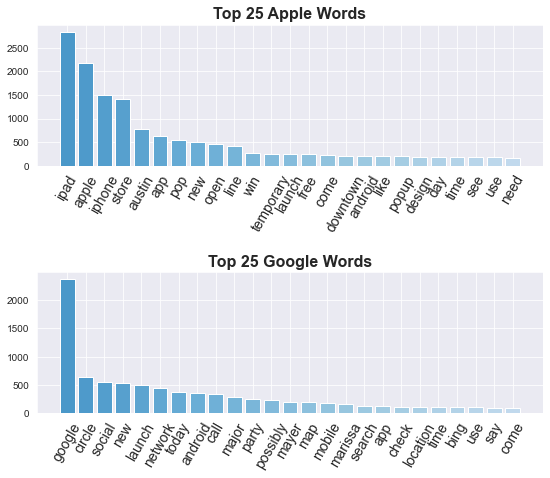

In [513]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,7))

# generating apple bar plot on first axes
axes[0].bar(apple_bar_words, apple_bar_counts, color=color)
axes[0].set_title('Top 25 Apple Words', weight='bold', fontsize=16)
# generating google bar plot on second axes
axes[1].bar(google_bar_words, google_bar_counts, color=color)
axes[1].set_title('Top 25 Google Words', weight='bold', fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)

plt.tight_layout(pad=2)
plt.savefig('word count bar graphs brand.png')
plt.show();

##### Bar Graphs by Sentiment

In [514]:
# creating counts of positive and negative with values and words
positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]
# same for negative
negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]
# same for neutral
neutral_bar_counts = [x[1] for x in neutral_freq.most_common(25)]
neutral_bar_words = [x[0] for x in neutral_freq.most_common(25)]

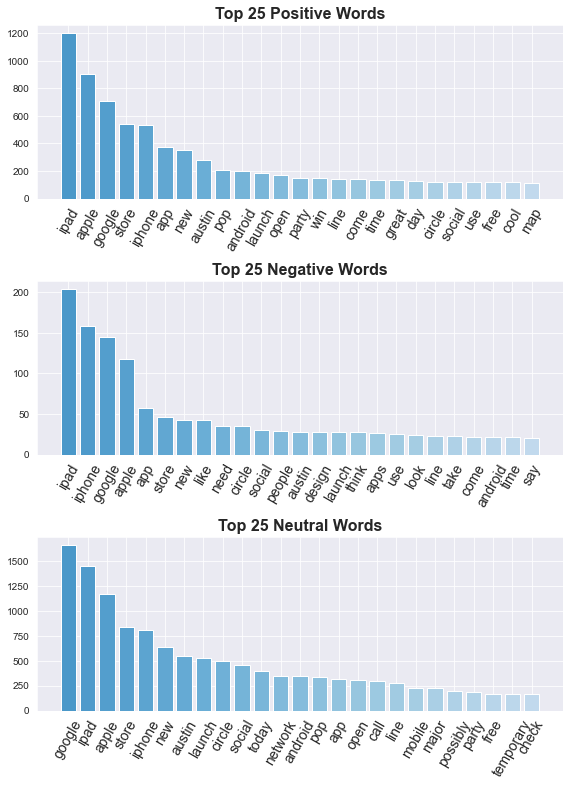

In [515]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,11))

# generating positive bar plot on first axes
axes[0].bar(positive_bar_words, positive_bar_counts, color=color)
axes[0].set_title('Top 25 Positive Words', weight='bold', fontsize=16)
# generating negative bar plot on second axes
axes[1].bar(negative_bar_words, negative_bar_counts, color=color)
axes[1].set_title('Top 25 Negative Words', weight='bold', fontsize=16)
# generating neutral bar plot on third axes
axes[2].bar(neutral_bar_words, neutral_bar_counts, color=color)
axes[2].set_title('Top 25 Neutral Words', weight='bold', fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)

plt.tight_layout(pad=1)
plt.savefig('word count bar graphs sentiment.png')
plt.show();

##### Bar Graphs by Brand and Sentiment

In [516]:
# creating counts of each brand by sentiemnt with values and words
apple_positive_bar_counts = [x[1] for x in apple_positive_freq.most_common(25)]
apple_positive_bar_words = [x[0] for x in apple_positive_freq.most_common(25)]
apple_negative_bar_counts = [x[1] for x in apple_negative_freq.most_common(25)]
apple_negative_bar_words = [x[0] for x in apple_negative_freq.most_common(25)]
apple_neutral_bar_counts = [x[1] for x in apple_neutral_freq.most_common(25)]
apple_neutral_bar_words = [x[0] for x in apple_neutral_freq.most_common(25)]
# same for google and each sentiment
google_positive_bar_counts = [x[1] for x in google_positive_freq.most_common(25)]
google_positive_bar_words = [x[0] for x in google_positive_freq.most_common(25)]
google_negative_bar_counts = [x[1] for x in google_negative_freq.most_common(25)]
google_negative_bar_words = [x[0] for x in google_negative_freq.most_common(25)]
google_neutral_bar_counts = [x[1] for x in google_neutral_freq.most_common(25)]
google_neutral_bar_words = [x[0] for x in google_neutral_freq.most_common(25)]

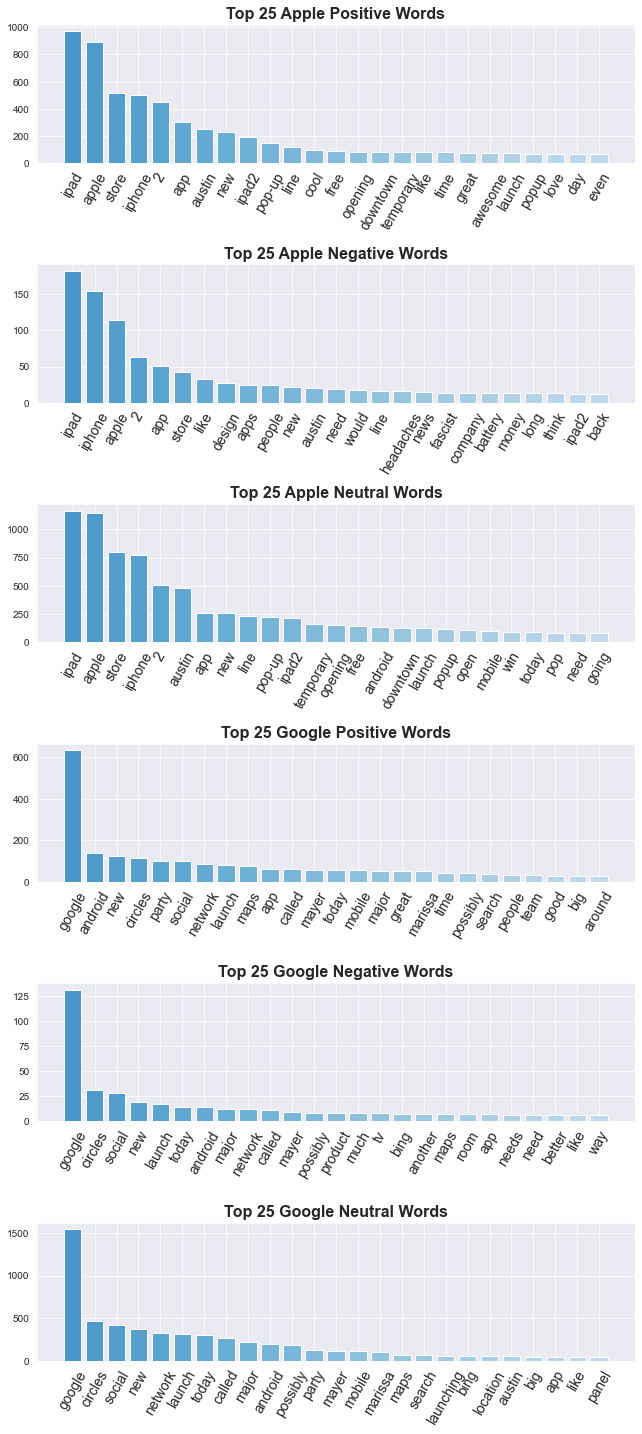

In [517]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(9,20))

# generating apple positive bar plot on first axes
axes[0].bar(apple_positive_bar_words, apple_positive_bar_counts, color=color)
axes[0].set_title('Top 25 Apple Positive Words', weight='bold', fontsize=16)
# generating apple bar negative plot on second axes
axes[1].bar(apple_negative_bar_words, apple_negative_bar_counts, color=color)
axes[1].set_title('Top 25 Apple Negative Words', weight='bold', fontsize=16)
# generating apple neutral bar plot on third axes
axes[2].bar(apple_neutral_bar_words, apple_neutral_bar_counts, color=color)
axes[2].set_title('Top 25 Apple Neutral Words', weight='bold', fontsize=16)
# generating google positive bar plot on fourth axes
axes[3].bar(google_positive_bar_words, google_positive_bar_counts, color=color)
axes[3].set_title('Top 25 Google Positive Words', weight='bold', fontsize=16)
# generating google negative bar plot on fifth axes
axes[4].bar(google_negative_bar_words, google_negative_bar_counts, color=color)
axes[4].set_title('Top 25 Google Negative Words', weight='bold', fontsize=16)
# generating google neutral bar plot on sixth axes
axes[5].bar(google_neutral_bar_words, google_neutral_bar_counts, color=color)
axes[5].set_title('Top 25 Google Neutral Words', weight='bold', fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)

plt.tight_layout(pad=1)
plt.savefig('word count bar graphs brand sentiment.png')
plt.show();

### Word Clouds
We will display the most frequent words in a wordcloud and look for patterns. [(wordcloud documentation)](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud)The more frequently occurring words will take up more space in the word cloud, the more frequent words are both larger and with darker hues. We will use custom mask and color for the word clouds. [(custom color and mask example)](http://amueller.github.io/word_cloud/auto_examples/a_new_hope.html)

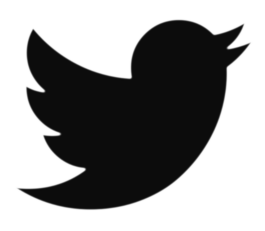

In [518]:
# import twitter logo
image = np.array(Image.open('twitter_mask.png'))
# prepare image array to show as an image
plt.imshow(image, interpolation='bilinear') 
# remove axis and show the image
plt.axis('off') 
plt.show(); 

In [519]:
# create a function that generates a set saturation range of the twitter blue color using hsl color code
def twitter_blue(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(203, 100%%, %d%%)" % random.randint(45, 80)

In [520]:
# adding additional words to stopwords_list
sw_list += ['apple', 'google']

#### Word Clouds by Brand

##### Apple Word Cloud

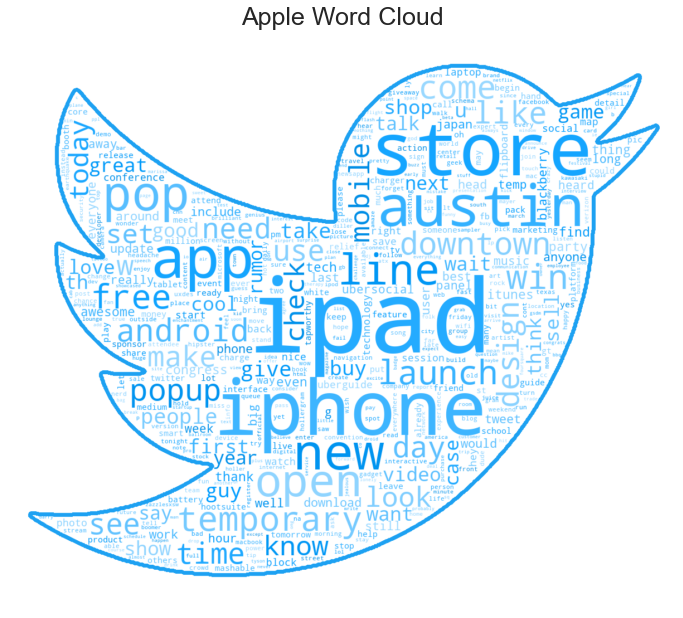

In [521]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list, # do not include predefined stopword list
                      # do not include bigrams
                      collocations=False, 
                      # set background to white
                      background_color='white',
                      # setting maximum number of words to 500 to avoid overcrowding
                      max_words=500,
                      # setting twitter bird image as the wordcloud mask
                      mask=image,
                      # setting bird border color to twitter blue
                      contour_color='#1DA1F2',
                      # setting bird border width
                      contour_width=10)
# generate a word cloud for apple words only
wordcloud.generate(','.join(apple_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Apple Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Google Word Cloud

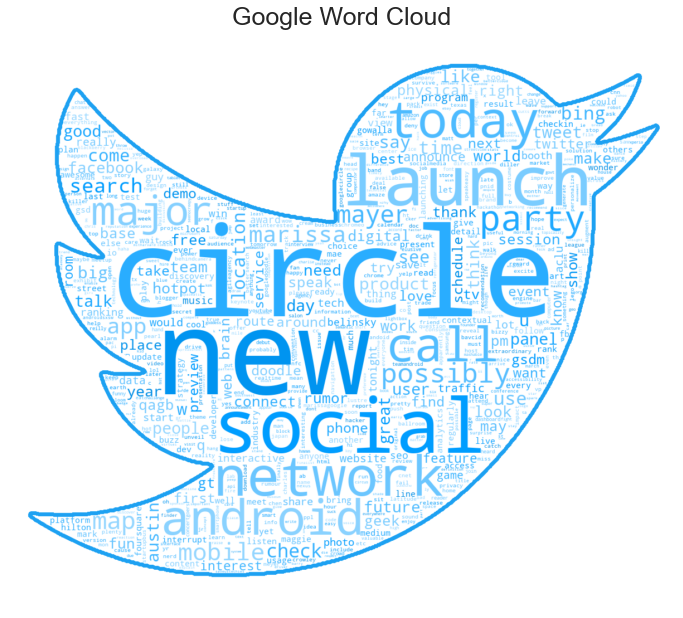

In [522]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for google words only
wordcloud.generate(','.join(google_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Google Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

#### Word Clouds by Sentiment

##### Positive Word Cloud

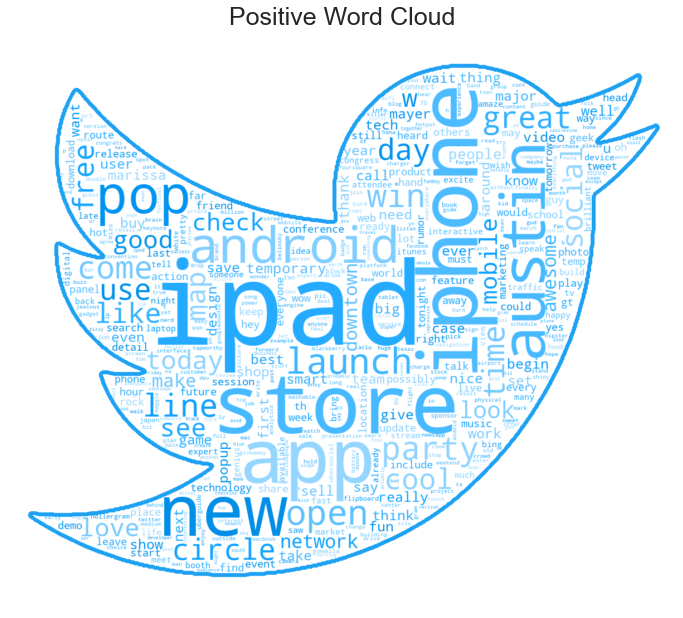

In [523]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=500, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for positive words only
wordcloud.generate(','.join(pos_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Positive Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Negative Word Cloud

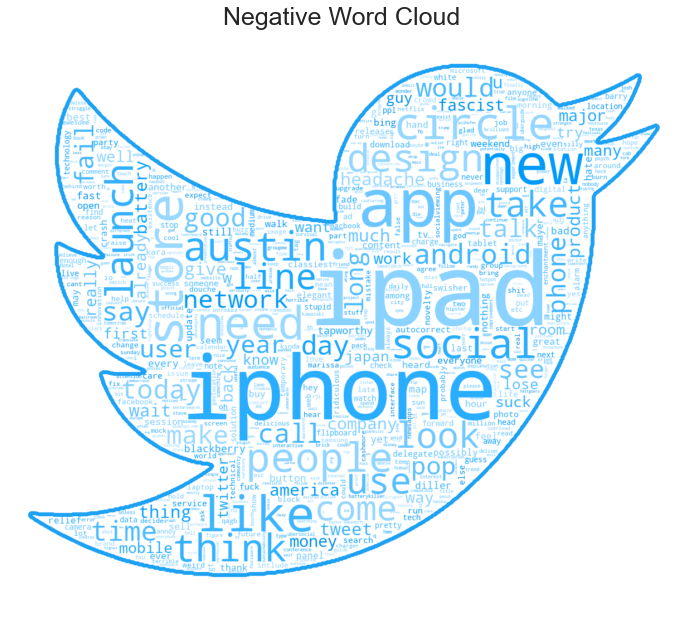

In [524]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for negative words only
wordcloud.generate(','.join(neg_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Negative Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Neutral Word Cloud

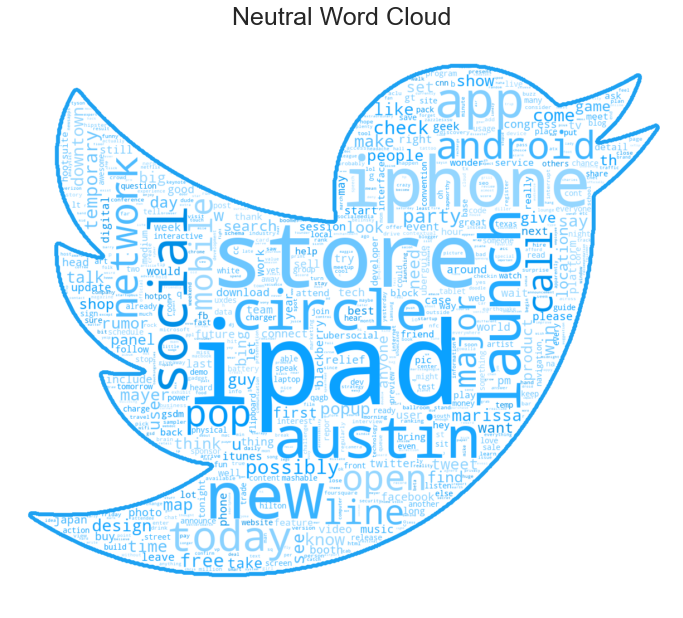

In [525]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for neutral words only
wordcloud.generate(','.join(neu_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Neutral Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

#### Word Clouds by Brand and Sentiment

##### Apple Positive Word Cloud

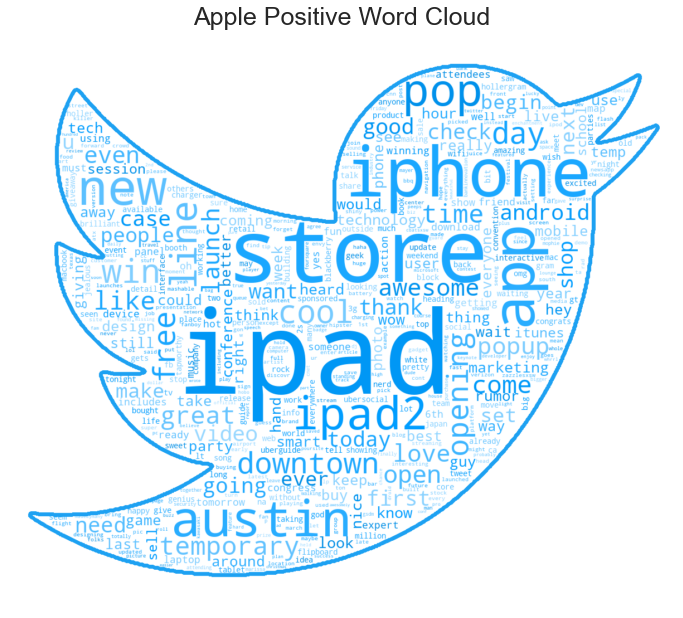

In [526]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=500, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for apple positive words only
wordcloud.generate(','.join(apple_positive_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Apple Positive Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Apple Negative Word Cloud

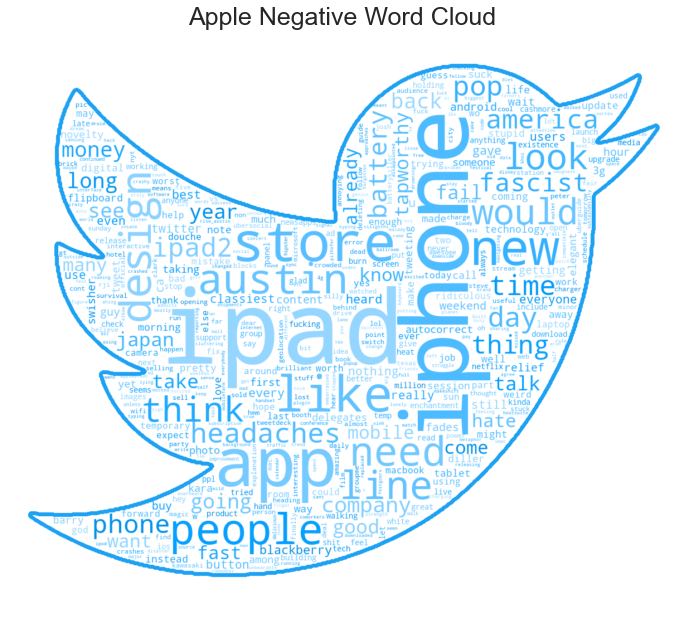

In [527]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=500, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for apple negative words only
wordcloud.generate(','.join(apple_negative_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Apple Negative Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Apple Neutral Word Cloud

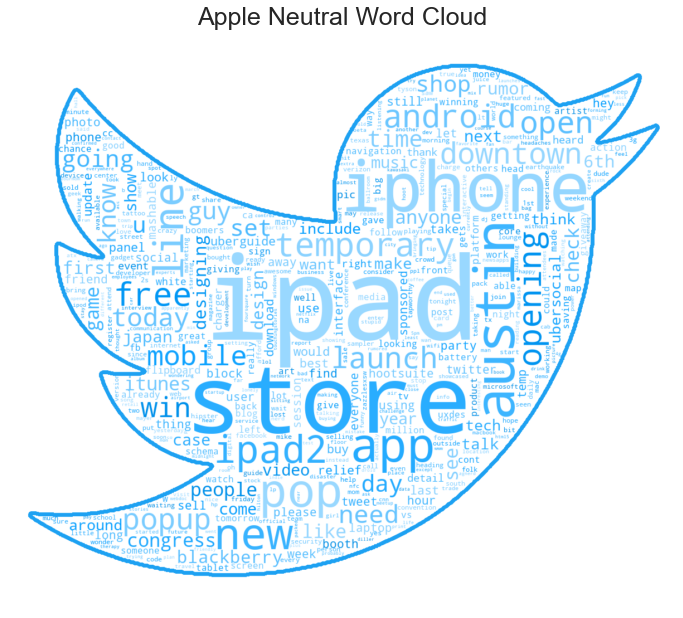

In [528]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=500, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for apple neutral words only
wordcloud.generate(','.join(apple_neutral_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Apple Neutral Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Google Positive Word Cloud

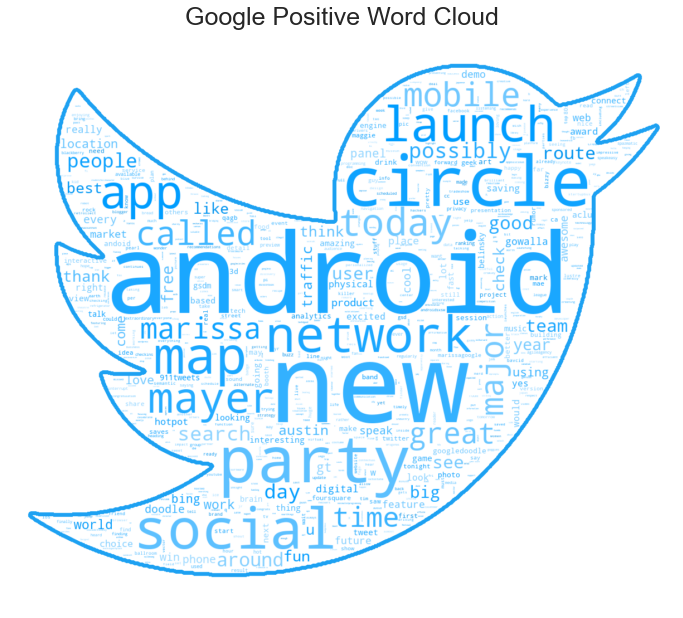

In [529]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for google positive words only
wordcloud.generate(','.join(google_positive_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Google Positive Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Google Negative Word Cloud

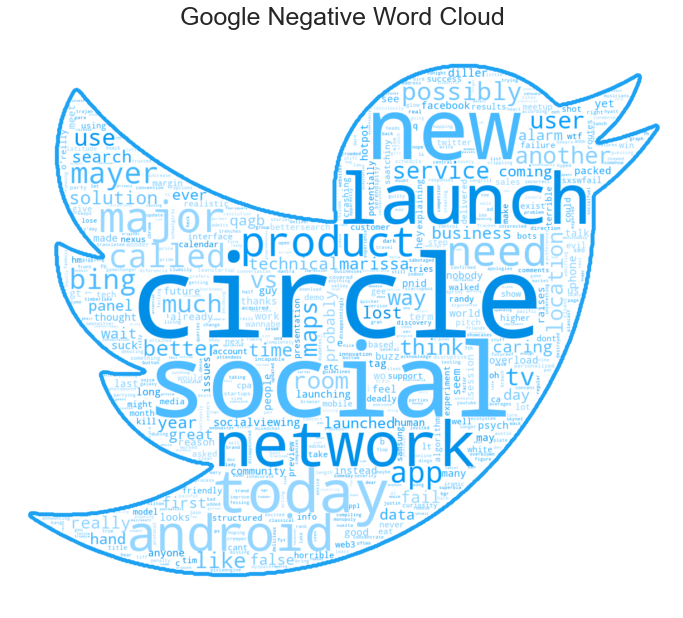

In [530]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for google negative words only
wordcloud.generate(','.join(google_negative_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Google Negative Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Google Neutral Word Cloud

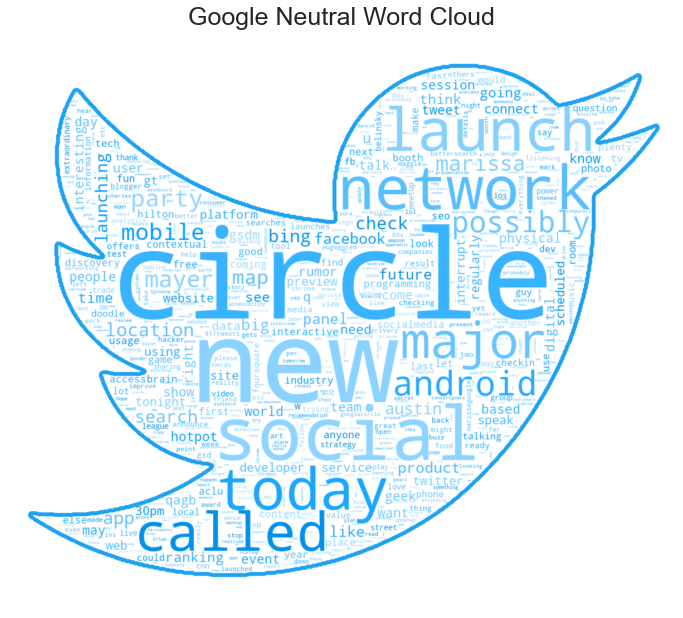

In [531]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for google neutral words only
wordcloud.generate(','.join(google_neutral_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Google Neutral Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

# Hashtag Visuals

In [532]:
# import english stop word list and add additional strings to list
sw = stopwords.words(['english'])
sw += list(string.punctuation)
# adding additional words to stopwords_list
sw += [ 'apple', '#apple', 'google', '#google', 'sxsw', '#sxsw', '@sxsw', 'sxsw.', 'sxswi', '#sxswi', 'rt', '#rt' ]

#### Bar Graphs by Brand and Sentiment
##### Apple Positive Hashtags

In [533]:
# hashtags are isolated 
hashapple_positive_data = df_apple_positive['htags']
# hashtags are converted and stored into a list
hash_list = hashapple_positive_data.to_list()

Total hashtags:  1192
Repeated hashtags:  456


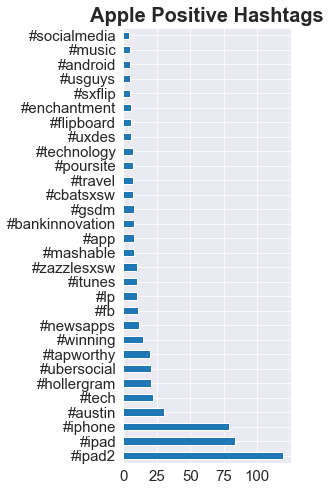

In [534]:
# hashtag list is flattened and converted into a data frame
flat_hashtags_df = pd.DataFrame([item for sublist in hash_list for item in sublist if item not in sw])
flat_hashtags_df.shape 
# change name of the column to htags
flat_hashtags_df.columns = ['htags']
# print hashtag counts to identify total number of hashtags and unique hashtags
print("Total hashtags: ", len(flat_hashtags_df['htags']))
print("Repeated hashtags: ", len(flat_hashtags_df['htags'].unique()))
# plotting top 30 hashtags by brand and sentiment
flat_hashtags_df['htags'].value_counts()[:30].plot(kind='barh', figsize=(3,8), fontsize=15)
# setting graph title 
plt.title('Apple Positive Hashtags', weight='bold',size=20);


##### Apple Negative Hashtags

In [535]:
# hashtags are isolated 
hashapple_negative_data = df_apple_negative['htags']
# hashtags are converted and stored into a list
hash_list = hashapple_negative_data.to_list()

Total hashtags:  204
Repeated hashtags:  117


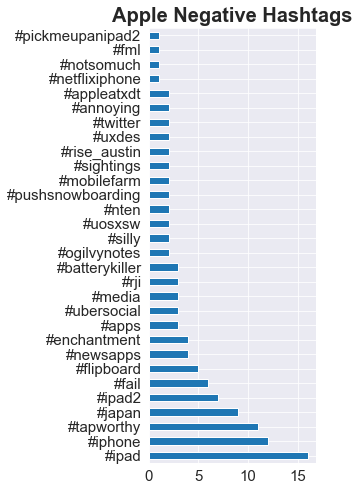

In [536]:
# hashtag list is flattened and converted into a data frame
flat_hashtags_df = pd.DataFrame([item for sublist in hash_list for item in sublist if item not in sw])
flat_hashtags_df.shape 
# change name of the column to htags
flat_hashtags_df.columns = ['htags']
# print hashtag counts to identify total number of hashtags and unique hashtags
print("Total hashtags: ", len(flat_hashtags_df['htags']))
print("Repeated hashtags: ", len(flat_hashtags_df['htags'].unique()))
# plotting top 30 hashtags by brand and sentiment
flat_hashtags_df['htags'].value_counts()[:30].plot(kind='barh', figsize=(3,8), fontsize=15)
# setting graph title 
plt.title('Apple Negative Hashtags', weight='bold',size=20);


##### Apple Neutral Hashtags

In [537]:
# hashtags are isolated 
hashapple_neutral_data = df_apple_neutral['htags']
# hashtags are converted and stored into a list
hash_list = hashapple_neutral_data.to_list()

Total hashtags:  1898
Repeated hashtags:  647


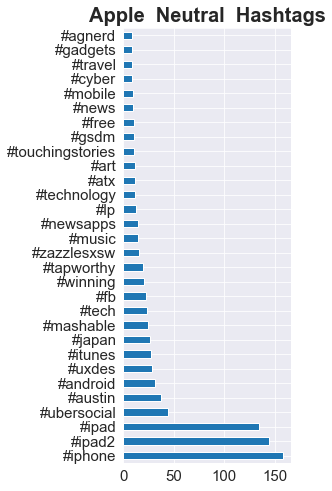

In [538]:
# hashtag list is flattened and converted into a data frame
flat_hashtags_df = pd.DataFrame([item for sublist in hash_list for item in sublist if item not in sw])
# change name of the column to htags
flat_hashtags_df.columns = ['htags']
# print hashtag counts to identify total number of hashtags and unique hashtags
print("Total hashtags: ", len(flat_hashtags_df['htags']))
print("Repeated hashtags: ", len(flat_hashtags_df['htags'].unique()))
# plotting top 30 hashtags by brand and sentiment
flat_hashtags_df['htags'].value_counts()[:30].plot(kind='barh', figsize=(3,8), fontsize=15)
# setting graph title 
plt.title('Apple  Neutral  Hashtags', weight='bold',size=20);

##### Google Positive Hashtags

In [539]:
# hashtags are isolated 
hashgoogle_positive_data = df_google_positive['htags']
# hashtags are converted and stored into a list
hash_list = hashgoogle_positive_data.to_list()


Total hashtags:  324
Repeated hashtags:  174


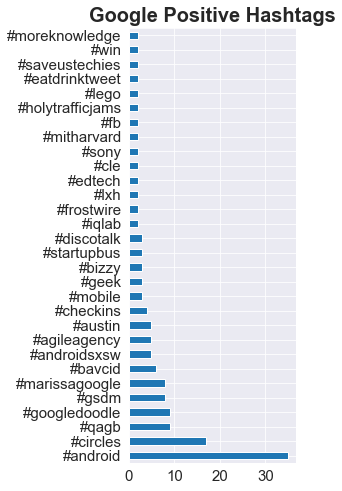

In [540]:
# hashtag list is flattened and converted into a data frame
flat_hashtags_df = pd.DataFrame([item for sublist in hash_list for item in sublist if item not in sw])
# change name of the column to htags
flat_hashtags_df.columns = ['htags']
# print hashtag counts to identify total number of hashtags and unique hashtags
print("Total hashtags: ", len(flat_hashtags_df['htags']))
print("Repeated hashtags: ", len(flat_hashtags_df['htags'].unique()))
# plotting top 30 hashtags by brand and sentiment
flat_hashtags_df['htags'].value_counts()[:30].plot(kind='barh', figsize=(3,8), fontsize=15)
# setting graph title 
plt.title('Google Positive Hashtags', weight='bold',size=20);

##### Google Negative Hashtags

In [541]:
# hashtags are isolated 
hashgoogle_negative_data = df_google_negative['htags']
# hashtags are converted and stored into a list
hash_list = hashgoogle_negative_data.to_list()


Total hashtags:  66
Repeated hashtags:  38


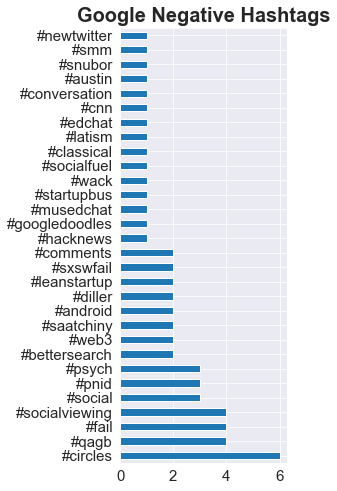

In [542]:
# hashtag list is flattened and converted into a data frame
flat_hashtags_df = pd.DataFrame([item for sublist in hash_list for item in sublist if item not in sw])
# change name of the column to htags
flat_hashtags_df.columns = ['htags']
# print hashtag counts to identify total number of hashtags and unique hashtags
print("Total hashtags: ", len(flat_hashtags_df['htags']))
print("Repeated hashtags: ", len(flat_hashtags_df['htags'].unique()))
# plotting top 30 hashtags by brand and sentiment
flat_hashtags_df['htags'].value_counts()[:30].plot(kind='barh', figsize=(3,8), fontsize=15)
# setting graph title 
plt.title('Google Negative Hashtags', weight='bold',size=20);

###### Google Neutral Hashtags

In [543]:
# hashtags are isolated 
hashgoogle_neutral_data = df_google_neutral['htags']
# hashtags are converted and stored into a list
hash_list = hashgoogle_neutral_data.to_list()

Total hashtags:  846
Repeated hashtags:  349


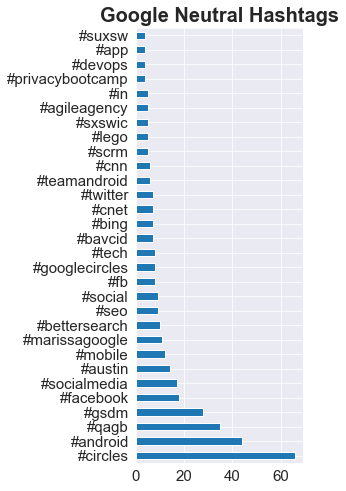

In [544]:
# hashtag list is flattened and converted into a data frame
flat_hashtags_df = pd.DataFrame([item for sublist in hash_list for item in sublist if item not in sw])
# change name of the column to htags
flat_hashtags_df.columns = ['htags']
# print hashtag counts to identify total number of hashtags and unique hashtags
print("Total hashtags: ", len(flat_hashtags_df['htags']))
print("Repeated hashtags: ", len(flat_hashtags_df['htags'].unique()))
# plotting top 30 hashtags by brand and sentiment
flat_hashtags_df['htags'].value_counts()[:30].plot(kind='barh', figsize=(3,8), fontsize=15)
# setting graph title 
plt.title('Google Neutral Hashtags', weight='bold',size=20);